<a href="https://colab.research.google.com/github/gauravnarayan/AbaloneProjGB/blob/main/AbaloneClassificationGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install pycaret

## A typical workflow in PyCaret consist of following steps

## **Setup** --> **Compare Models** --> **Analyze Model** --> **Prediction** --> **Save Model**

In [2]:
!pip install ucimlrepo

# Importing the data

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [4]:
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


## Find correlation between the feature variables



In [5]:
X.corr()
#all features are highly correlated among themselves

<ipython-input-5-6dce2619b72b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X.corr()


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338
Whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355
Shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617
Viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656
Shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000


In [6]:
# import pandas as pd
# df=pd.concat([X,y],axis=1,join='inner')
# df

## Combine X,y to form the dataframe 'df' for inputing to setup

In [7]:
import pandas as pd
df=pd.concat([X,y],axis="columns")
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [72]:
from pycaret.classification import *
s=setup(data=df,target='Sex',session_id=123)

,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 9)"
5,Transformed data shape,"(4177, 9)"
6,Transformed train set shape,"(2923, 9)"
7,Transformed test set shape,"(1254, 9)"
8,Numeric features,8
9,Preprocess,True


In [9]:
!pip install mlflow

### Default setup with train:test ratio of 70:30
### 10 fold stratified cross validation
### In Pycaret, target is mapped using Label encoder
### for this dataset the label encoder maps F: 0, I: 1, M: 2

In [29]:
from pycaret.classification import *

In [10]:
from pycaret.classification import ClassificationExperiment
s=ClassificationExperiment()
clf=s.setup(data=df,target='Sex',session_id=123)
# clf1=s.setup(data=df,target='Sex',session_id=123,polynomial_features=True)

,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 9)"
5,Transformed data shape,"(4177, 9)"
6,Transformed train set shape,"(2923, 9)"
7,Transformed test set shape,"(1254, 9)"
8,Numeric features,8
9,Preprocess,True


In [11]:
clf.get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [12]:
clf.get_config('dataset_transformed')

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex
629,0.340,0.265,0.085,0.1835,0.0770,0.0460,0.0650,10.0,2
1496,0.620,0.480,0.165,1.0725,0.4815,0.2350,0.3120,9.0,2
323,0.265,0.205,0.070,0.1055,0.0390,0.0410,0.0350,5.0,1
2473,0.615,0.470,0.175,1.2985,0.5135,0.3430,0.3200,14.0,0
3996,0.315,0.230,0.000,0.1340,0.0575,0.0285,0.3505,6.0,1
...,...,...,...,...,...,...,...,...,...
772,0.385,0.275,0.115,0.2685,0.0975,0.0825,0.0850,8.0,2
3344,0.495,0.380,0.145,0.5150,0.1750,0.0980,0.2120,13.0,1
1978,0.700,0.550,0.175,1.4405,0.6565,0.2985,0.3750,12.0,2
3532,0.380,0.285,0.090,0.2305,0.1005,0.0390,0.0775,7.0,1


In [13]:
clf.get_config('X_train')

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
629,0.340,0.265,0.085,0.1835,0.0770,0.0460,0.0650,10
1496,0.620,0.480,0.165,1.0725,0.4815,0.2350,0.3120,9
323,0.265,0.205,0.070,0.1055,0.0390,0.0410,0.0350,5
2473,0.615,0.470,0.175,1.2985,0.5135,0.3430,0.3200,14
3996,0.315,0.230,0.000,0.1340,0.0575,0.0285,0.3505,6
...,...,...,...,...,...,...,...,...
4140,0.645,0.535,0.190,1.2395,0.4680,0.2385,0.4240,10
2478,0.470,0.355,0.180,0.4410,0.1525,0.1165,0.1350,8
3060,0.630,0.515,0.175,1.1955,0.4920,0.2470,0.3700,11
3939,0.555,0.420,0.145,0.8695,0.3075,0.2575,0.2500,14


In [14]:
# get_config('y'), get_config('y_transformed')
print(clf.get_config('y'))
print(clf.get_config('y_transformed'))

629     M
1496    M
323     I
2473    F
3996    I
       ..
772     M
3344    I
1978    M
3532    I
3288    F
Name: Sex, Length: 4177, dtype: category
Categories (3, object): ['F', 'I', 'M']
629     2
1496    2
323     1
2473    0
3996    1
       ..
772     2
3344    1
1978    2
3532    1
3288    0
Name: Sex, Length: 4177, dtype: int64


In [36]:
best=clf.compare_models()
# best=s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5549,0.7544,0.5549,0.5462,0.5370,0.3267,0.3343,0.1630
ridge,Ridge Classifier,0.5491,0.0000,0.5491,0.5358,0.5304,0.3210,0.3279,0.0730
lda,Linear Discriminant Analysis,0.5484,0.7497,0.5484,0.5412,0.5394,0.3186,0.3216,0.0440
gbc,Gradient Boosting Classifier,0.5481,0.7433,0.5481,0.5369,0.5373,0.3176,0.3207,1.7650
rf,Random Forest Classifier,0.5436,0.7409,0.5436,0.5365,0.5384,0.3125,0.3135,0.5720
et,Extra Trees Classifier,0.5330,0.7361,0.5330,0.5250,0.5274,0.2973,0.2982,0.5010
lightgbm,Light Gradient Boosting Machine,0.5323,0.7334,0.5323,0.5262,0.5282,0.2960,0.2966,0.7450
ada,Ada Boost Classifier,0.5316,0.7280,0.5316,0.5142,0.5086,0.2920,0.2995,0.2120
svm,SVM - Linear Kernel,0.5269,0.0000,0.5269,0.4707,0.4347,0.2801,0.3459,0.1460
qda,Quadratic Discriminant Analysis,0.5265,0.7379,0.5265,0.5136,0.4942,0.2861,0.2990,0.0420


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [39]:
print(best)
# LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
#                    multi_class='auto', n_jobs=None, penalty='l2',
#                    random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
#                    warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [43]:
# evaluate_model(best) we can see the Feature importance and Confusion matrix
clf.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [44]:
# evaluate_model(best) we can see the Confusion matrix
clf.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Feature Engineering Setup with Polynomial_features=True

In [45]:
from pycaret.classification import ClassificationExperiment
s=ClassificationExperiment()
clf1=s.setup(data=df,target='Sex',session_id=123,polynomial_features=True)

,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 9)"
5,Transformed data shape,"(4177, 45)"
6,Transformed train set shape,"(2923, 45)"
7,Transformed test set shape,"(1254, 45)"
8,Numeric features,8
9,Preprocess,True


In [46]:
clf1.get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [47]:
clf1.get_config('dataset_transformed')

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Length^2,Length Diameter,...,Shucked_weight Viscera_weight,Shucked_weight Shell_weight,Shucked_weight Rings,Viscera_weight^2,Viscera_weight Shell_weight,Viscera_weight Rings,Shell_weight^2,Shell_weight Rings,Rings^2,Sex
629,0.340,0.265,0.085,0.1835,0.0770,0.0460,0.0650,10.0,0.115600,0.090100,...,0.003542,0.005005,0.7700,0.002116,0.002990,0.460,0.004225,0.6500,100.0,2
1496,0.620,0.480,0.165,1.0725,0.4815,0.2350,0.3120,9.0,0.384400,0.297600,...,0.113152,0.150228,4.3335,0.055225,0.073320,2.115,0.097344,2.8080,81.0,2
323,0.265,0.205,0.070,0.1055,0.0390,0.0410,0.0350,5.0,0.070225,0.054325,...,0.001599,0.001365,0.1950,0.001681,0.001435,0.205,0.001225,0.1750,25.0,1
2473,0.615,0.470,0.175,1.2985,0.5135,0.3430,0.3200,14.0,0.378225,0.289050,...,0.176130,0.164320,7.1890,0.117649,0.109760,4.802,0.102400,4.4800,196.0,0
3996,0.315,0.230,0.000,0.1340,0.0575,0.0285,0.3505,6.0,0.099225,0.072450,...,0.001639,0.020154,0.3450,0.000812,0.009989,0.171,0.122850,2.1030,36.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0.385,0.275,0.115,0.2685,0.0975,0.0825,0.0850,8.0,0.148225,0.105875,...,0.008044,0.008287,0.7800,0.006806,0.007013,0.660,0.007225,0.6800,64.0,2
3344,0.495,0.380,0.145,0.5150,0.1750,0.0980,0.2120,13.0,0.245025,0.188100,...,0.017150,0.037100,2.2750,0.009604,0.020776,1.274,0.044944,2.7560,169.0,1
1978,0.700,0.550,0.175,1.4405,0.6565,0.2985,0.3750,12.0,0.490000,0.385000,...,0.195965,0.246187,7.8780,0.089102,0.111938,3.582,0.140625,4.5000,144.0,2
3532,0.380,0.285,0.090,0.2305,0.1005,0.0390,0.0775,7.0,0.144400,0.108300,...,0.003920,0.007789,0.7035,0.001521,0.003023,0.273,0.006006,0.5425,49.0,1


In [48]:
clf1.get_config('X_train_transformed')

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Length^2,Length Diameter,...,Shucked_weight^2,Shucked_weight Viscera_weight,Shucked_weight Shell_weight,Shucked_weight Rings,Viscera_weight^2,Viscera_weight Shell_weight,Viscera_weight Rings,Shell_weight^2,Shell_weight Rings,Rings^2
629,0.340,0.265,0.085,0.1835,0.0770,0.0460,0.0650,10.0,0.115600,0.090100,...,0.005929,0.003542,0.005005,0.7700,0.002116,0.002990,0.460,0.004225,0.650,100.0
1496,0.620,0.480,0.165,1.0725,0.4815,0.2350,0.3120,9.0,0.384400,0.297600,...,0.231842,0.113152,0.150228,4.3335,0.055225,0.073320,2.115,0.097344,2.808,81.0
323,0.265,0.205,0.070,0.1055,0.0390,0.0410,0.0350,5.0,0.070225,0.054325,...,0.001521,0.001599,0.001365,0.1950,0.001681,0.001435,0.205,0.001225,0.175,25.0
2473,0.615,0.470,0.175,1.2985,0.5135,0.3430,0.3200,14.0,0.378225,0.289050,...,0.263682,0.176130,0.164320,7.1890,0.117649,0.109760,4.802,0.102400,4.480,196.0
3996,0.315,0.230,0.000,0.1340,0.0575,0.0285,0.3505,6.0,0.099225,0.072450,...,0.003306,0.001639,0.020154,0.3450,0.000812,0.009989,0.171,0.122850,2.103,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4140,0.645,0.535,0.190,1.2395,0.4680,0.2385,0.4240,10.0,0.416025,0.345075,...,0.219024,0.111618,0.198432,4.6800,0.056882,0.101124,2.385,0.179776,4.240,100.0
2478,0.470,0.355,0.180,0.4410,0.1525,0.1165,0.1350,8.0,0.220900,0.166850,...,0.023256,0.017766,0.020588,1.2200,0.013572,0.015727,0.932,0.018225,1.080,64.0
3060,0.630,0.515,0.175,1.1955,0.4920,0.2470,0.3700,11.0,0.396900,0.324450,...,0.242064,0.121524,0.182040,5.4120,0.061009,0.091390,2.717,0.136900,4.070,121.0
3939,0.555,0.420,0.145,0.8695,0.3075,0.2575,0.2500,14.0,0.308025,0.233100,...,0.094556,0.079181,0.076875,4.3050,0.066306,0.064375,3.605,0.062500,3.500,196.0


In [49]:
# print(clf1.get_config('y'))
# print(clf1.get_config('y_transformed'))

In [50]:
best=clf1.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5744,0.7660,0.5744,0.5638,0.5604,0.3581,0.3632,1.6120
ridge,Ridge Classifier,0.5645,0.0000,0.5645,0.5519,0.5494,0.3438,0.3490,0.0790
lda,Linear Discriminant Analysis,0.5580,0.7550,0.5580,0.5523,0.5498,0.3326,0.3359,0.1190
gbc,Gradient Boosting Classifier,0.5484,0.7465,0.5484,0.5374,0.5388,0.3185,0.3212,9.0050
ada,Ada Boost Classifier,0.5416,0.7287,0.5416,0.5262,0.5243,0.3073,0.3127,0.8060
rf,Random Forest Classifier,0.5409,0.7434,0.5409,0.5363,0.5375,0.3087,0.3094,1.2190
et,Extra Trees Classifier,0.5395,0.7408,0.5395,0.5342,0.5350,0.3065,0.3076,0.5170
lightgbm,Light Gradient Boosting Machine,0.5272,0.7266,0.5272,0.5228,0.5238,0.2881,0.2887,3.3410
xgboost,Extreme Gradient Boosting,0.5252,0.7253,0.5252,0.5213,0.5221,0.2845,0.2852,1.6800
knn,K Neighbors Classifier,0.5224,0.7045,0.5224,0.5195,0.5195,0.2838,0.2846,0.0920


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

### Setup with multicollinearity_threshold =0.9 (removes features based on their collinearity with each other)
### The setup keeps only features Height, Shucked_weight, Rings

In [51]:
s=ClassificationExperiment()
clf2=s.setup(data=df,target='Sex',session_id=123,remove_multicollinearity=True,multicollinearity_threshold=0.9)

,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 9)"
5,Transformed data shape,"(4177, 4)"
6,Transformed train set shape,"(2923, 4)"
7,Transformed test set shape,"(1254, 4)"
8,Numeric features,8
9,Preprocess,True


In [52]:
clf2.get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [53]:
clf2.get_config('X_train_transformed')

,Height,Shucked_weight,Rings
629,0.085,0.0770,10.0
1496,0.165,0.4815,9.0
323,0.070,0.0390,5.0
2473,0.175,0.5135,14.0
3996,0.000,0.0575,6.0
...,...,...,...
4140,0.190,0.4680,10.0
2478,0.180,0.1525,8.0
3060,0.175,0.4920,11.0
3939,0.145,0.3075,14.0


In [54]:
best=clf2.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.5464,0.7437,0.5464,0.5359,0.5184,0.3110,0.3236,0.0550
ridge,Ridge Classifier,0.5436,0.0000,0.5436,0.5276,0.5038,0.3088,0.3253,0.0500
lr,Logistic Regression,0.5429,0.7430,0.5429,0.5387,0.5033,0.3034,0.3234,0.0990
nb,Naive Bayes,0.5416,0.7423,0.5416,0.5313,0.5060,0.3043,0.3203,0.0510
qda,Quadratic Discriminant Analysis,0.5361,0.7387,0.5361,0.5184,0.4968,0.2970,0.3125,0.0860
ada,Ada Boost Classifier,0.5214,0.7240,0.5214,0.5138,0.5113,0.2770,0.2806,0.3290
gbc,Gradient Boosting Classifier,0.5163,0.7319,0.5163,0.5055,0.5064,0.2696,0.2724,0.9180
knn,K Neighbors Classifier,0.5077,0.6880,0.5077,0.5052,0.5043,0.2625,0.2636,0.0710
lightgbm,Light Gradient Boosting Machine,0.4981,0.7113,0.4981,0.4923,0.4941,0.2442,0.2448,0.6660
svm,SVM - Linear Kernel,0.4974,0.0000,0.4974,0.4730,0.4250,0.2315,0.2876,0.0860


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

<AxesSubplot: >

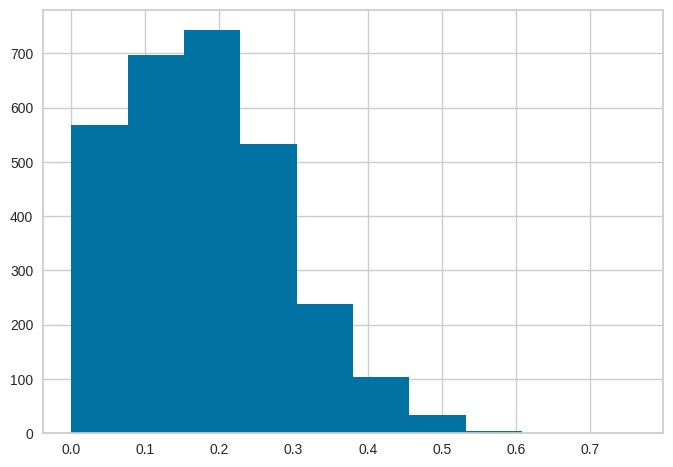

In [57]:
#the data is not normally distributed as seen below
clf.get_config('X_train_transformed')['Viscera_weight'].hist()

<AxesSubplot: >

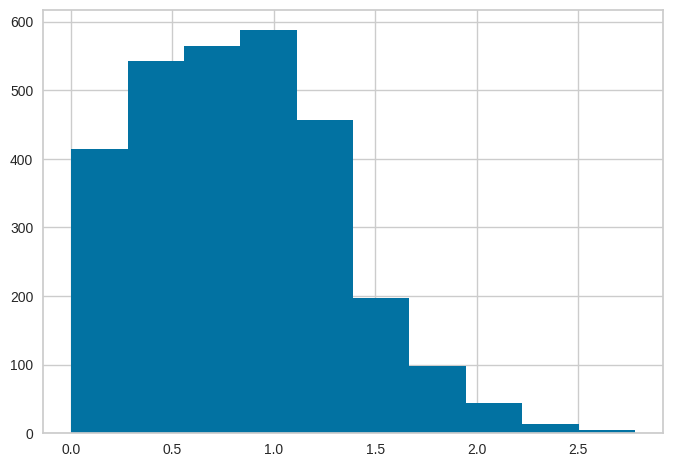

In [58]:
#the data is not normally distributed as seen below
clf.get_config('X_train_transformed')['Whole_weight'].hist()

## Using "minmax scaler" for normalizing data as the data features have different scales and are not normally distributed

In [59]:
s=ClassificationExperiment()
clf3=s.setup(df, target = 'Sex', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 9)"
5,Transformed data shape,"(4177, 9)"
6,Transformed train set shape,"(2923, 9)"
7,Transformed test set shape,"(1254, 9)"
8,Numeric features,8
9,Preprocess,True


In [60]:
clf3.get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [61]:
# dataset without scaling
clf.get_config('dataset_transformed')

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex
629,0.340,0.265,0.085,0.1835,0.0770,0.0460,0.0650,10.0,2
1496,0.620,0.480,0.165,1.0725,0.4815,0.2350,0.3120,9.0,2
323,0.265,0.205,0.070,0.1055,0.0390,0.0410,0.0350,5.0,1
2473,0.615,0.470,0.175,1.2985,0.5135,0.3430,0.3200,14.0,0
3996,0.315,0.230,0.000,0.1340,0.0575,0.0285,0.3505,6.0,1
...,...,...,...,...,...,...,...,...,...
772,0.385,0.275,0.115,0.2685,0.0975,0.0825,0.0850,8.0,2
3344,0.495,0.380,0.145,0.5150,0.1750,0.0980,0.2120,13.0,1
1978,0.700,0.550,0.175,1.4405,0.6565,0.2985,0.3750,12.0,2
3532,0.380,0.285,0.090,0.2305,0.1005,0.0390,0.0775,7.0,1


In [62]:
# dataset with minmax scaling
clf3.get_config('dataset_transformed')

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex
629,0.358108,0.352941,0.075221,0.065347,0.056296,0.059908,0.063279,0.346154,2
1496,0.736486,0.714286,0.146018,0.385419,0.355926,0.308756,0.309417,0.307692,2
323,0.256757,0.252101,0.061947,0.037264,0.028148,0.053325,0.033383,0.153846,1
2473,0.729730,0.697479,0.154867,0.466787,0.379630,0.450955,0.317389,0.500000,0
3996,0.324324,0.294118,0.000000,0.047525,0.041852,0.036866,0.347783,0.192308,1
...,...,...,...,...,...,...,...,...,...
772,0.418919,0.369748,0.101770,0.095950,0.071481,0.107966,0.083209,0.269231,2
3344,0.567568,0.546219,0.128319,0.184698,0.128889,0.128374,0.209766,0.461538,1
1978,0.844595,0.831933,0.154867,0.517912,0.485556,0.392363,0.372197,0.423077,2
3532,0.412162,0.386555,0.079646,0.082268,0.073704,0.050691,0.075735,0.230769,1


In [63]:
best=clf3.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5566,0.7539,0.5566,0.5484,0.5400,0.3296,0.3366,0.0860
svm,SVM - Linear Kernel,0.5563,0.0000,0.5563,0.5114,0.5155,0.3292,0.3529,0.0670
ridge,Ridge Classifier,0.5525,0.0000,0.5525,0.5398,0.5346,0.3264,0.3330,0.0690
lda,Linear Discriminant Analysis,0.5484,0.7497,0.5484,0.5412,0.5394,0.3186,0.3216,0.0530
gbc,Gradient Boosting Classifier,0.5481,0.7435,0.5481,0.5369,0.5374,0.3176,0.3207,1.7640
rf,Random Forest Classifier,0.5416,0.7406,0.5416,0.5346,0.5366,0.3095,0.3104,0.8680
lightgbm,Light Gradient Boosting Machine,0.5347,0.7366,0.5347,0.5282,0.5298,0.2993,0.3002,0.8600
et,Extra Trees Classifier,0.5330,0.7360,0.5330,0.5251,0.5274,0.2973,0.2982,0.3910
ada,Ada Boost Classifier,0.5316,0.7280,0.5316,0.5142,0.5086,0.2920,0.2995,0.2210
qda,Quadratic Discriminant Analysis,0.5265,0.7379,0.5265,0.5136,0.4942,0.2861,0.2990,0.0500


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [64]:
# evaluate_model(best)
clf3.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [66]:
# evaluate_model(best)
clf3.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## As the data is multiclass using F1 score as a performance measure and selecting the top 3 models

In [67]:
best_models_top3 = clf3.compare_models(sort ='F1', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5566,0.7539,0.5566,0.5484,0.5400,0.3296,0.3366,0.1580
lda,Linear Discriminant Analysis,0.5484,0.7497,0.5484,0.5412,0.5394,0.3186,0.3216,0.1000
gbc,Gradient Boosting Classifier,0.5481,0.7435,0.5481,0.5369,0.5374,0.3176,0.3207,1.7870
rf,Random Forest Classifier,0.5416,0.7406,0.5416,0.5346,0.5366,0.3095,0.3104,0.6660
ridge,Ridge Classifier,0.5525,0.0000,0.5525,0.5398,0.5346,0.3264,0.3330,0.0480
lightgbm,Light Gradient Boosting Machine,0.5347,0.7366,0.5347,0.5282,0.5298,0.2993,0.3002,1.2070
et,Extra Trees Classifier,0.5330,0.7360,0.5330,0.5251,0.5274,0.2973,0.2982,0.4360
knn,K Neighbors Classifier,0.5217,0.7083,0.5217,0.5174,0.5178,0.2830,0.2841,0.0760
xgboost,Extreme Gradient Boosting,0.5210,0.7237,0.5210,0.5152,0.5170,0.2787,0.2793,0.3030
svm,SVM - Linear Kernel,0.5563,0.0000,0.5563,0.5114,0.5155,0.3292,0.3529,0.0700


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [68]:
# Outputing the top 3 models based on F1 score
best_models_top3

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=None, solver='svd',
                            store_covariance=False, tol=0.0001),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
          

# Voting classifiers (using the top 3 models based on F1 score)

In [70]:
s=ClassificationExperiment()
clf3=s.setup(df, target = 'Sex', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,Sex
2,Target type,Multiclass
3,Target mapping,"F: 0, I: 1, M: 2"
4,Original data shape,"(4177, 9)"
5,Transformed data shape,"(4177, 9)"
6,Transformed train set shape,"(2923, 9)"
7,Transformed test set shape,"(1254, 9)"
8,Numeric features,8
9,Preprocess,True


In [73]:
blend_models(best_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5427,0.7479,0.5427,0.5240,0.5246,0.3102,0.3151
1,0.5768,0.7733,0.5768,0.5731,0.5676,0.3603,0.3648
2,0.5461,0.7560,0.5461,0.5386,0.5337,0.3130,0.3182
3,0.5856,0.7482,0.5856,0.5711,0.5610,0.3737,0.3839
4,0.5582,0.7517,0.5582,0.5512,0.5399,0.3303,0.3385
5,0.5274,0.7439,0.5274,0.5102,0.5133,0.2879,0.2907
6,0.5753,0.7549,0.5753,0.5659,0.5658,0.3585,0.3615
7,0.5548,0.7606,0.5548,0.5361,0.5390,0.3293,0.3330
8,0.5822,0.7442,0.5822,0.5731,0.5718,0.3693,0.3729


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=123,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('Linear Discriminant Analysis',
                              LinearDiscriminantAnalysis(covar...
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=100,
                                                         n_iter_no_change=None,
                                                         random_state=123,
                                                         subsample=1.0,
                                                         tol=0.0001,
                                                         validation_fraction=0.1,
                                                         verbose=0,
                                                         warm_start=False))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5427,0.7479,0.5427,0.5240,0.5246,0.3102,0.3151
1,0.5768,0.7733,0.5768,0.5731,0.5676,0.3603,0.3648
2,0.5461,0.7560,0.5461,0.5386,0.5337,0.3130,0.3182
3,0.5856,0.7482,0.5856,0.5711,0.5610,0.3737,0.3839
4,0.5582,0.7517,0.5582,0.5512,0.5399,0.3303,0.3385
5,0.5274,0.7439,0.5274,0.5102,0.5133,0.2879,0.2907
6,0.5753,0.7549,0.5753,0.5659,0.5658,0.3585,0.3615
7,0.5548,0.7606,0.5548,0.5361,0.5390,0.3293,0.3330
8,0.5822,0.7442,0.5822,0.5731,0.5718,0.3693,0.3729


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

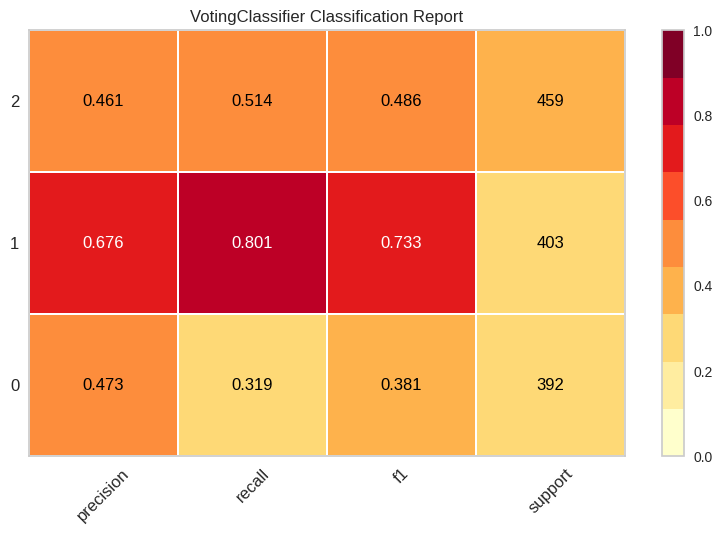

In [74]:
# plot class report
plot_model(blend_models(best_models_top3), plot = 'class_report')

## Stacking classifier (Stack models using the top 3 models based F1 score)

In [75]:
stack_models(best_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5666,0.7644,0.5666,0.5582,0.5568,0.3462,0.3494
1,0.5973,0.7859,0.5973,0.6019,0.5943,0.3909,0.3947
2,0.5597,0.7705,0.5597,0.5561,0.5548,0.3347,0.3370
3,0.5685,0.7532,0.5685,0.5572,0.5571,0.3484,0.3518
4,0.5616,0.7592,0.5616,0.5492,0.5475,0.3372,0.3420
5,0.5651,0.7675,0.5651,0.5544,0.5562,0.3450,0.3470
6,0.5479,0.7541,0.5479,0.5385,0.5360,0.3148,0.3199
7,0.5445,0.7674,0.5445,0.5270,0.5313,0.3146,0.3171
8,0.5685,0.7625,0.5685,0.5720,0.5587,0.3455,0.3530


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingClassifier(cv=5,
                   estimators=[('Logistic Regression',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=1000,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=123,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                               ('Linear Discriminant Analysis',
                                LinearDiscriminantAnalysi...
                                                           validation_fraction=0.1,
                                                           verbose=0,
                                                           warm_start=False))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=True, stack_method='auto', verbose=0)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5666,0.7644,0.5666,0.5582,0.5568,0.3462,0.3494
1,0.5973,0.7859,0.5973,0.6019,0.5943,0.3909,0.3947
2,0.5597,0.7705,0.5597,0.5561,0.5548,0.3347,0.3370
3,0.5685,0.7532,0.5685,0.5572,0.5571,0.3484,0.3518
4,0.5616,0.7592,0.5616,0.5492,0.5475,0.3372,0.3420
5,0.5651,0.7675,0.5651,0.5544,0.5562,0.3450,0.3470
6,0.5479,0.7541,0.5479,0.5385,0.5360,0.3148,0.3199
7,0.5445,0.7674,0.5445,0.5270,0.5313,0.3146,0.3171
8,0.5685,0.7625,0.5685,0.5720,0.5587,0.3455,0.3530


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

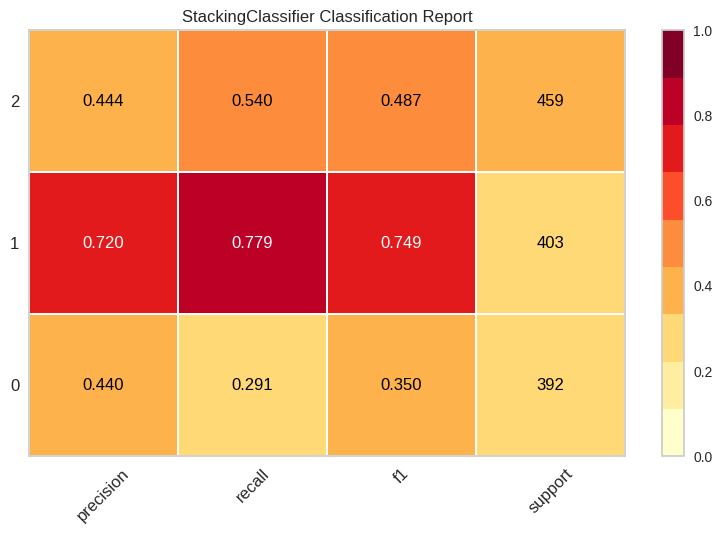

In [76]:
# plot class report
plot_model(stack_models(best_models_top3), plot = 'class_report')

## Selecting the best model

In [77]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/5 [00:00<?, ?it/s]

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Voting Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.5594,0.7547,0.5594,0.5473,0.5447,0.3346,0.3396
1,Voting Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.5594,0.7547,0.5594,0.5473,0.5447,0.3346,0.3396
2,Stacking Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.5648,0.7660,0.5648,0.5580,0.5553,0.3425,0.3464
3,Stacking Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.5648,0.7660,0.5648,0.5580,0.5553,0.3425,0.3464


In [78]:
# select the best model based on F1
lb.sort_values(by="F1",ascending=False)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Length', 'Diameter', 'Height',
                                             'Whole_weight', 'Shucked_weight',
                                             'Viscera_weight', 'Shell_weight',
                                             'Rings'],
                                    transformer=SimpleImputer(add_indicato...
                                                                            verbose=0,
                                                                            warm_start=False))],
                                    final_estimator=LogisticRegression(C=1.0,
                                                                       class_weight=None,
                                                                       dual=False,
                                                                       fit_intercept=True,
                                                                       intercept_scaling=1,
                                                                       l1_ratio=None,
                                                                       max_iter=1000,
                                                                       multi_class='auto',
                                                                       n_jobs=None,
                                                                       penalty='l2',
                                                                       random_state=123,
                                                                       solver='lbfgs',
                                                                       tol=0.0001,
                                                                       verbose=0,
                                                                       warm_start=False),
                                    n_jobs=-1, passthrough=True,
                                    stack_method='auto', verbose=0)]],
         verbose=False)

In [79]:
automl()

StackingClassifier(cv=5,
                   estimators=[('Logistic Regression',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=1000,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=123,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                               ('Linear Discriminant Analysis',
                                LinearDiscriminantAnalysi...
                                                           validation_fraction=0.1,
                                                           verbose=0,
                                                           warm_start=False))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=True, stack_method='auto', verbose=0)

In [80]:
final_best = finalize_model(stack_models(best_models_top3))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5666,0.7644,0.5666,0.5582,0.5568,0.3462,0.3494
1,0.5973,0.7859,0.5973,0.6019,0.5943,0.3909,0.3947
2,0.5597,0.7705,0.5597,0.5561,0.5548,0.3347,0.3370
3,0.5685,0.7532,0.5685,0.5572,0.5571,0.3484,0.3518
4,0.5616,0.7592,0.5616,0.5492,0.5475,0.3372,0.3420
5,0.5651,0.7675,0.5651,0.5544,0.5562,0.3450,0.3470
6,0.5479,0.7541,0.5479,0.5385,0.5360,0.3148,0.3199
7,0.5445,0.7674,0.5445,0.5270,0.5313,0.3146,0.3171
8,0.5685,0.7625,0.5685,0.5720,0.5587,0.3455,0.3530


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [81]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Length', 'Diameter', 'Height',
                                             'Whole_weight', 'Shucked_weight',
                                             'Viscera_weight', 'Shell_weight',
                                             'Rings'],
                                    transformer=SimpleImputer(add_indicato...
                                                                            verbose=0,
                                                                            warm_start=False))],
                                    final_estimator=LogisticRegression(C=1.0,
                                                                       class_weight=None,
                                                                       dual=False,
                                                                       fit_intercept=True,
                                                                       intercept_scaling=1,
                                                                       l1_ratio=None,
                                                                       max_iter=1000,
                                                                       multi_class='auto',
                                                                       n_jobs=None,
                                                                       penalty='l2',
                                                                       random_state=123,
                                                                       solver='lbfgs',
                                                                       tol=0.0001,
                                                                       verbose=0,
                                                                       warm_start=False),
                                    n_jobs=-1, passthrough=True,
                                    stack_method='auto', verbose=0))],
         verbose=False)

## Save the ML model for future use as a .pkl file

In [82]:
save_model(final_best,model_name='best-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Length', 'Diameter', 'Height',
                                              'Whole_weight', 'Shucked_weight',
                                              'Viscera_weight', 'Shell_weight',
                                              'Rings'],
                                     transformer=SimpleImputer(add_indicato...
                                                                             verbose=0,
                                                                             warm_start=False))],
                                     final_estimator=LogisticRegression(C=1.0,
                                          

In [83]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Length', 'Diameter', 'Height',
                                             'Whole_weight', 'Shucked_weight',
                                             'Viscera_weight', 'Shell_weight',
                                             'Rings'],
                                    transformer=SimpleImputer(a...
                                                                            verbose=0,
                                                                            warm_start=False))],
                                    final_estimator=LogisticRegression(C=1.0,
  

In [84]:
print(df.columns)
# selecting row 0 for prediction with predict_model
df.loc[0,:]

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')


Sex                    M
Length             0.455
Diameter           0.365
Height             0.095
Whole_weight       0.514
Shucked_weight    0.2245
Viscera_weight     0.101
Shell_weight        0.15
Rings                 15
Name: 0, dtype: object

In [85]:

# model = load_model("best-model")

In [86]:
import pandas as pd
import numpy as np
float_features = [0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15]
features = pd.DataFrame([np.array(float_features)],columns=['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight','Viscera_weight', 'Shell_weight', 'Rings'])
prediction = predict_model(loaded_bestmodel,features)

In [87]:
prediction

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,prediction_label,prediction_score
0,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15.0,M,0.4255


In [88]:
print("The original class of the row 0 is",df.loc[0][0])

The original class of the row 0 is M


In [89]:
print("This is the predicted class of row 0 is",prediction['prediction_label'][0])
print("with a prediction score of",prediction['prediction_score'][0])

This is the predicted class of row 0 is M
with a prediction score of 0.4255
